**Classificação Supervisionada usando Random Forest Classifier**

Vamos prever através do modelo de classificação supervisionado, se o vinho é de boa qualidade ou má através das características apresentadas no dataset

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_dataset = pd.read_csv('winequality-red.csv')

In [3]:
wine_dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# tamanho do dataset
wine_dataset.shape

(1599, 12)

In [5]:
# checando valores faltantes
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# estatísticas do dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# verificando a correlação entre algumas variáveis
correlation = wine_dataset.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

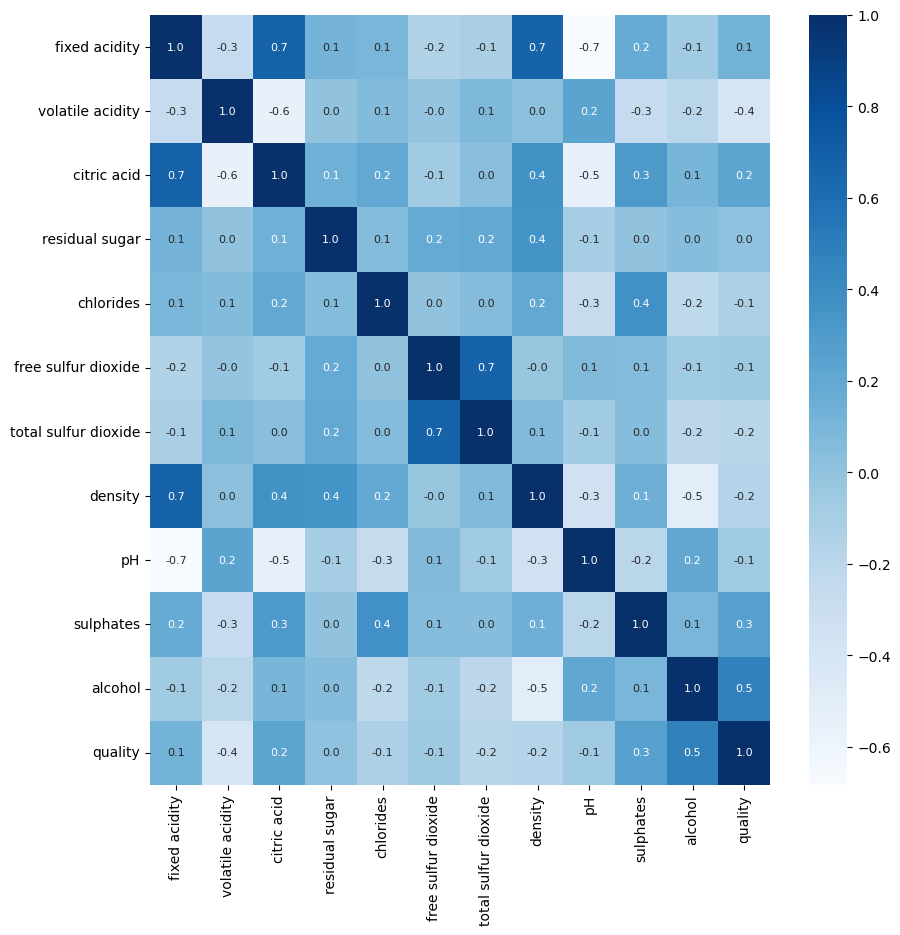

In [39]:
# plotando o mapa de calor para as variáveis, importamos a biblioteca matplotlib para aumentar o gráfico
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(correlation, annot=True, cbar=True, fmt= '.1f', annot_kws={'size':8}, cmap='Blues')

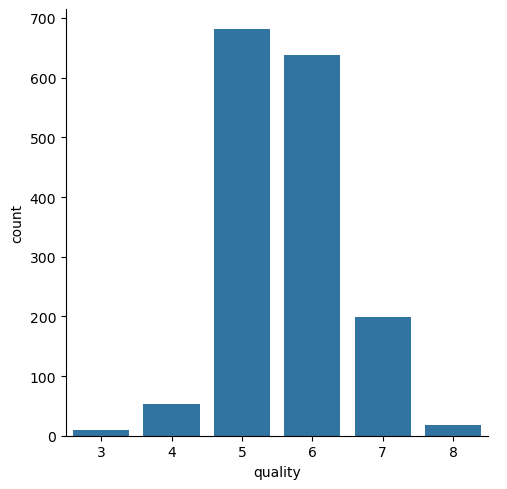

In [37]:
# contagem de vinhos separados por qualidade
sns.catplot(x='quality', data=wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

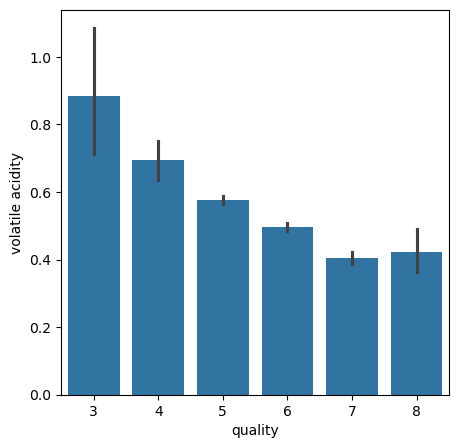

In [10]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

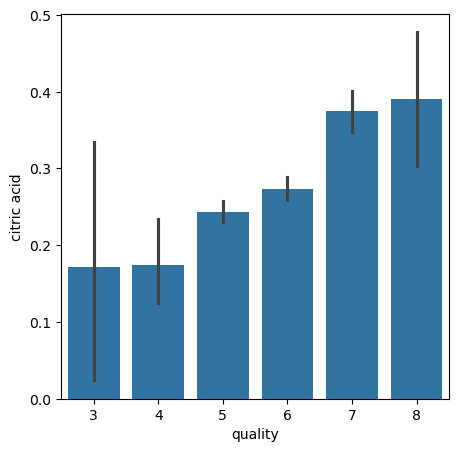

In [11]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

In [14]:
# vamos separar os dados em previsores e alvo
X = wine_dataset.drop('quality', axis=1)
Y = wine_dataset['quality']

In [40]:
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [16]:
# para aplicarmos a classificação vamos dividir as qualidades em dois grupos:
# bom e ruim, vamos considerar os vinhos de qualidade maior ou igual a 7 como bons
# e os de qualidade menor que 7 como ruins
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)


In [17]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [18]:
# vamos separar em dados de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, stratify=Y, test_size=0.2)

In [19]:
# checando os tamanhos dos datasets de treino e teste
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [20]:
# chamando o modelo de classificação
model = RandomForestClassifier()

In [21]:
# treinando os dados de treino no modelo
model.fit(X_train, Y_train)

RandomForestClassifier()

In [22]:
# vamos fazer a previsão usando o modelo, e assim ao compararmos com os dados reais teremos a acurácia do modelo
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy on test: ', test_data_accuracy )

Accuracy on test:  0.946875


In [23]:
# faremos o mesmo processo com os dados de teste, lembrando que é importante que a acurácia usando dados de treino
# e teste devem ser semelhantes indicando não haver problemas de "overfitting"

X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print('Accuracy on trainning: ', train_data_accuracy )

Accuracy on trainning:  1.0


In [24]:
# seguindo estes passos conseguimos prever novos valores para um novo vinho e descobrirmos se ele se enquandra 
# nos vinhos bons ou ruins
input_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

print(prediction)

if prediction == 0:
    print('Bad Quality Wine')
else:
    print('Good Quality Wine')

[0]
Bad Quality Wine


C:\Users\mau_a\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
